## **0. 패키지 설치 - 설치 완료 후 커널 재시작**

In [19]:
#%pip install kiwipiepy 
#%pip install wordcloud 
#%pip install pandas

## **1. 라이브러리가져오기**

In [20]:
# 데이터 처리를 위한 라이브러리
import pandas as pd
from collections import Counter  
from kiwipiepy import Kiwi

In [21]:
# 그래프 생성을 위한 라이브러리
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [22]:
# 워드클라우드 생성을 위한 라이브러리
import numpy as np
from PIL import Image
from wordcloud import WordCloud

## **2. 데이터 준비하기**



### **2-1. 데이터 가져오기**
- csv파일로부터 데이터를 읽고, 데이터의 내용을 확인한다.



In [23]:
# 데이터 읽기
df = pd.read_csv('enfp.csv')
df

,Unnamed: 0,data
0,0,엔프피 입니다. 갑자기 딴소리 하는 이유 알려드립니다. “원숭이 엉덩이는 빨개 빨가...
1,1,Enfp가 갑자기 이상한 행동을 하거나 말을 하는 이유는 머리회전이 너무 빠르기 때...
2,2,저 enfp인데 누가백번 못해줘도 한번 잘해주면마음 다풀리는듯요ㅠ님들도 그러시나요?
3,3,엔프피 컴퓨터 특 : 브라우저 여러창에 각각 탭 수십개씩 열려있고 닫힐 생각을 않는...
4,4,엔프피는 의도하지 않아도 레전드사건이 많이 일어나..
...,...,...
750,750,istp애가 계속 ㅈ문가라는데 설명을 해도 이게 그 아 흠... 개답답해요
751,751,nf=좌파 sp=우파
752,752,정말이상해요 intj istp intp 나왔다가 방금 또 엔프피나왔어요 왜 매번 바...
753,753,"엔티제 기준 엔프피는 성인 ADHD가 있는것 같고,, 약간 덜떨어진것 같음,, 음,..."




- 데이터의 정보를 확인한다.



In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  755 non-null    int64 
 1   data        755 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.9+ KB



### **2-2. 데이터 전처리하기**
➊ NULL값이 존재하는 행 제거



In [25]:
# Null 값이 존재하는 행 제거
df = df.dropna()

len(df)

755

➋ 특수 문자로만 이루어진 행을 제거

- str.replace("변경할 문자", "변경 문자") 


In [26]:
# 특수 문자 제거
df.loc[:, 'data'] = df['data'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "", regex=True)

# 빈 문자열 제거
df = df[df['data'].str.strip() != '']

len(df)

749

### **2-3. 명사 추출 및 불용어 제거하기**
 ➊ 명사 추출하기
 - 일반 명사 : NNG (Common Noun)
 - 고유 명사 : NNP (Proper Noun )

In [27]:
# 형태소 분석 및 명사 추출
kiwi = Kiwi()
nouns = []

for sentence in df['data']:
    tokens = kiwi.analyze(sentence)
    for token in tokens[0][0]:
        if token[1] == 'NNG' or token[1] == 'NNP':  # 일반 명사와 고유 명사
            nouns.append(token[0])
nouns

['엔프피',
 '딴소리',
 '이유',
 '원숭이',
 '엉덩이',
 '사과',
 '사과',
 '바나나',
 '바나나',
 '생각',
 '이동',
 '원숭이',
 '이야기',
 '기차',
 '이야기',
 '이상',
 '행동',
 '말',
 '이유',
 '머리',
 '회전',
 '물건',
 '물건',
 '평소',
 '의문점',
 '관련',
 '기억',
 '마음',
 'ㅠ님',
 '엔프피',
 '컴퓨터',
 '특',
 '브라우저',
 '창',
 '탭',
 '생각',
 '않는다엔프피',
 '넥플릭스',
 '특',
 '시청',
 '콘텐츠',
 '반',
 '시즌',
 '끝',
 '정',
 '주행',
 '경우',
 '엔프피',
 '의도',
 '레전드',
 '사건',
 '장점',
 '단점',
 '감정',
 '스트레스',
 '뒤끝',
 '기분',
 '때',
 '옆',
 '사람',
 '눈치',
 '특',
 '다음',
 '취미',
 '생활',
 '계획',
 '상상',
 '중임',
 '스키',
 '등산',
 '서핑',
 '웨이',
 '보드',
 '밍',
 '통기타',
 '스쿠버',
 '다이빙',
 '춤',
 '비행기',
 '조종',
 '프리',
 '다이빙',
 '인라인',
 '스케이트',
 '마라톤',
 '번지',
 '점프',
 '세계',
 '여행',
 '국토',
 '종주',
 '캠핑',
 '오로라',
 '보기',
 '사막',
 '피라미드',
 '보기',
 '해외',
 '봉사',
 '활동',
 '아프리카',
 '기',
 '아마존',
 '악어',
 '보기',
 '국내',
 '봉사',
 '활동',
 '해외',
 '배낭여행',
 '국내',
 '배낭여행',
 '자전거',
 '국토',
 '종주',
 '스카이다이빙',
 '패러글라이딩',
 '브리',
 '곡',
 '피아노',
 '우주여행',
 '워홀',
 '독서',
 '독서',
 '록',
 '쓰기',
 '독서',
 '모임',
 '테마파크',
 '알바',
 '영화관',
 '알바',
 '철인',
 '종',
 '세계',
 '최장',
 '짚',


➋ 1글자 단어 제거하기 (예: 내, 저, 것  등등)
  - 리스트 컴프리헨션 : 리스트를 생성하는 짧고 간결한 방법
  - 사용방법 :[( 변수를 활용한 값 ) for ( 사용할 변수 이름 ) in ( 순회할 수 있는 값 )]

In [28]:
# 한글자 단어 제거하기 (예:내, 저, 것 등등)
filtered_nouns = [word for word in nouns if len(word) >= 2]

➌ 불용어 제거하기
  - 불용어란? 자연어 처리(NLP)에서 자주 등장하지만 의미가 없는 단어 

In [29]:
# 불용어 제거
stopwords = set(['엔프피'])
filtered_nouns = [word for word in filtered_nouns if word not in stopwords]

## **3. 데이터 시각확하기**

#### 1) 막대그래프 시각화하기
- 그래프 생성을 위한 단어 빈도수 계산

In [30]:
# 단어 빈도수 계산
word_counts = Counter(filtered_nouns)

#만약 findfont: font family '폰트 이름' not found. 에러가 뜨면 해당 함수를 호출하세요.
#물론 fname 변수,  name, update()함수 는 알맞게 수정 후 실행해야 합니다
def applyFont():
    fe = font_manager.FontEntry(
        fname=r'C:\\학교 과제\\알피코\\신송고\\MBTI_WordCloud\\NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
        name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
    font_manager.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
    plt.rcParams.update({'font.size': 18, 'font.family': 'NanumBarunGothic'}) # 폰트 설정


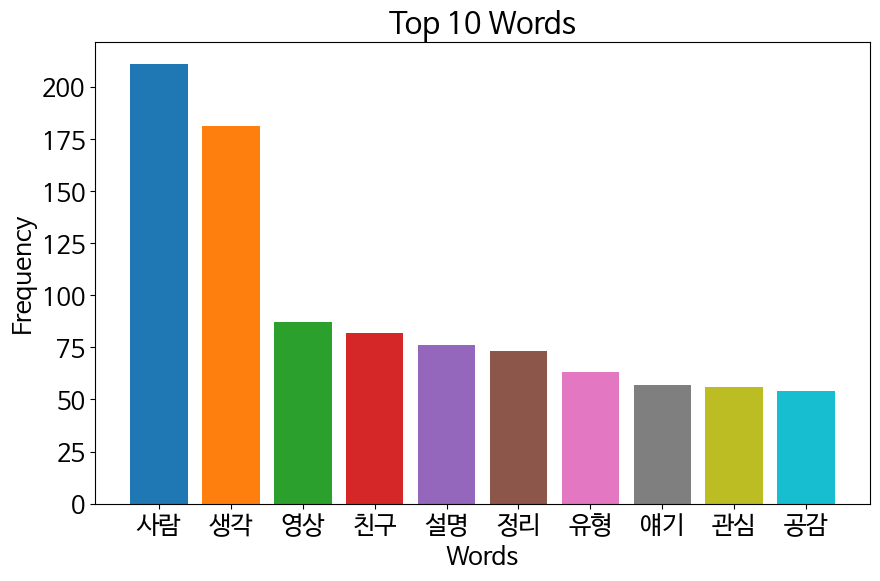

In [32]:
# 시각화 - 그래프
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

#applyFont()

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(10, 6))
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
plt.bar(words, counts, color=colors)

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words')
plt.savefig('my_bar.png', format='png')
plt.show()

#### 2) 워드 클라우드 시각화하기

In [33]:
# 워드 클라우드 마스크 이미지 로드
mask_img = np.array(Image.open('wordcloud_mask.png'))

In [34]:
# 워드 클라우드 생성
wordcloud = WordCloud(font_path='BMDOHYEON.ttf',
                      width=800, height=400,
                      background_color='white', mask = mask_img).generate_from_frequencies(word_counts)

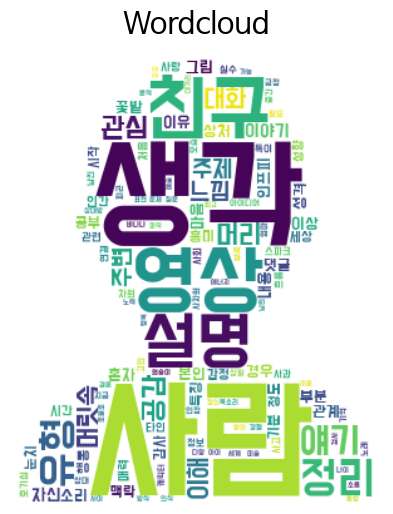

In [35]:
# 시각화 - 워드 클라우드
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud')
plt.savefig('my_wordcloud.png', format='png')
plt.show()